In [2]:
import pandas as pd
import yaml
root_path = '/local/work/merengelke/aipal/'
config = yaml.load(open('cfg.yaml', 'r'), Loader=yaml.FullLoader)

cities_countries = config['cities_countries']
paths = [f"{root_path}{city_country}/aipal/predict.csv" for city_country in cities_countries]

df = pd.DataFrame()
for path in paths:
    df_small = pd.read_csv(path)
    df_small['city_country'] = path.split('/')[-3]
    df = pd.concat([df, df_small])
    
# age over 18
if config['is_adult']:
    df = df[df['age'] > 18]
else:
    df = df[df['age'] <= 18]
df.drop(columns=['ELN', 'Diagnosis', 'additional.diagnosis.details..lineage.etc', 'lineage.details'], inplace=True, errors='ignore')
features = config['feature_columns']

# remove all empty chars form class
df['class'] = df['class'].str.strip()
df = df.groupby('city_country').filter(lambda x: len(x) > 30)

In [3]:
# All samples
df[features].describe().round(2)

,Fibrinogen_g_L,MCV_fL,Monocytes_percent,LDH_UI_L,PT_percent,MCHC_g_L,Lymphocytes_G_L,age,Monocytes_G_L,Platelets_G_L
count,3099.00,3444.00,3302.00,3382.00,3395.00,3360.00,3314.00,3464.00,3302.00,3460.00
mean,3.62,95.11,18.13,624.88,75.09,334.51,8.40,52.52,6.03,72.05
std,1.94,19.59,58.68,820.82,23.50,21.10,25.80,17.84,18.44,88.09
min,0.00,56.00,0.00,36.00,0.00,168.00,0.00,18.11,0.00,0.07
25%,2.42,88.50,1.86,239.92,62.46,324.00,0.98,38.00,0.08,24.00
50%,3.43,94.30,7.36,376.95,73.65,335.00,2.02,53.00,0.47,45.00
75%,4.58,100.72,26.19,681.00,88.00,345.00,5.30,67.00,3.00,91.00
max,33.00,1114.40,3000.00,11396.00,205.00,1000.00,402.80,121.44,225.58,2146.00


In [4]:
# AML samples
df[df['class'] == 'AML'].describe().round(2)

,age,MCV_fL,PT_percent,LDH_UI_L,MCHC_g_L,WBC_G_L,Fibrinogen_g_L,Monocytes_G_L,Platelets_G_L,Lymphocytes_G_L,Monocytes_percent,prediction.ALL,prediction.AML,prediction.APL
count,2495.00,2480.00,2442.00,2432.00,2427.00,2493.00,2154.00,2381.00,2492.00,2387.00,2381.00,2495.00,2495.00,2495.00
mean,56.09,97.06,74.39,577.69,332.73,30.88,3.96,6.88,77.20,6.62,20.44,0.17,0.77,0.06
std,17.10,22.35,24.01,703.15,21.76,53.76,1.79,19.93,94.20,17.41,68.02,0.21,0.24,0.11
min,18.61,56.00,0.00,36.00,168.00,0.02,0.00,0.00,0.07,0.00,0.00,0.00,0.01,0.00
25%,44.00,90.50,62.46,232.00,323.00,2.67,2.82,0.10,26.00,1.05,2.10,0.03,0.66,0.01
50%,57.03,96.55,73.54,364.50,334.00,9.03,3.80,0.60,50.00,2.11,9.09,0.08,0.87,0.02
75%,69.62,102.50,87.19,656.25,343.00,34.99,4.81,3.96,98.25,5.21,30.00,0.22,0.95,0.05
max,121.44,1114.40,172.79,11396.00,1000.00,556.44,33.00,225.58,2146.00,274.59,3000.00,0.98,0.99,0.94


In [5]:
# ALL samples
df[df['class'] == 'ALL'].describe().round(2)

,age,MCV_fL,PT_percent,LDH_UI_L,MCHC_g_L,WBC_G_L,Fibrinogen_g_L,Monocytes_G_L,Platelets_G_L,Lymphocytes_G_L,Monocytes_percent,prediction.ALL,prediction.AML,prediction.APL
count,549.00,544.00,534.00,542.00,519.00,549.00,526.00,530.00,549.00,531.00,530.00,549.00,549.00,549.00
mean,41.89,89.19,81.01,954.50,332.54,46.04,3.64,4.42,70.51,20.95,8.22,0.45,0.46,0.09
std,15.68,7.45,18.00,1297.04,17.33,82.84,1.93,15.46,80.52,50.70,11.44,0.30,0.30,0.16
min,19.00,59.80,21.97,78.00,232.00,0.50,0.46,0.00,1.00,0.00,0.00,0.01,0.01,0.00
25%,28.00,84.70,68.18,294.00,324.50,4.00,2.46,0.06,19.70,1.40,1.05,0.16,0.18,0.01
50%,40.00,88.30,78.33,538.50,334.00,13.33,3.35,0.32,42.00,3.32,3.07,0.42,0.41,0.03
75%,54.00,93.00,93.62,1021.65,343.00,47.83,4.52,2.05,88.00,13.10,10.09,0.72,0.74,0.07
max,87.00,125.30,143.00,10248.00,379.00,673.18,27.43,217.05,703.00,402.80,69.12,0.98,0.98,0.94


In [6]:
# APL samples
df[df['class'] == 'APL'].describe().round(2)

,age,MCV_fL,PT_percent,LDH_UI_L,MCHC_g_L,WBC_G_L,Fibrinogen_g_L,Monocytes_G_L,Platelets_G_L,Lymphocytes_G_L,Monocytes_percent,prediction.ALL,prediction.AML,prediction.APL
count,420.00,420.00,419.00,408.00,414.00,420.00,419.00,391.00,419.00,396.00,391.00,420.00,420.00,420.00
mean,45.18,91.29,71.66,468.31,347.42,15.53,1.85,3.04,43.45,2.33,17.52,0.15,0.37,0.48
std,17.03,6.79,25.44,474.21,16.49,26.86,1.66,10.72,43.02,5.79,23.77,0.18,0.29,0.31
min,18.11,63.70,0.00,96.10,282.00,0.20,0.05,0.00,2.00,0.00,0.00,0.00,0.00,0.01
25%,30.75,87.30,55.50,235.75,339.00,1.20,1.03,0.04,17.00,0.53,1.22,0.03,0.10,0.15
50%,43.50,90.75,68.00,326.50,348.00,3.46,1.50,0.20,29.00,0.94,5.65,0.09,0.29,0.51
75%,57.00,95.30,83.00,513.75,359.00,17.38,2.28,1.35,54.50,2.02,27.01,0.18,0.61,0.75
max,97.00,114.60,205.00,6249.00,423.00,205.00,26.30,129.20,275.00,83.77,150.00,0.94,0.97,0.98


In [7]:
import matplotlib.pyplot as plt
import math

def plot_boxplots_by_feature(df, title):
    # Number of features
    n_features = len(features)

    # Calculate rows and columns for two rows
    n_cols = math.ceil(n_features / 2)

    # Adjusting figure size for two rows
    fig, axes = plt.subplots(2, n_cols, figsize=(16, 10), sharey=False)

    # Flatten the axes array for easier iteration
    axes = axes.flatten()

    # Create individual box plots for each feature
    for idx, feature in enumerate(features):
        df.boxplot(column=feature, by='class', ax=axes[idx], showfliers=False)  # Exclude outliers
        axes[idx].set_title(feature)
        axes[idx].set_xlabel("Class")
        axes[idx].set_ylabel("Value")

    # Hide any unused subplots if features are fewer than total subplots
    for ax in axes[n_features:]:
        ax.set_visible(False)

    plt.suptitle(title)
    plt.tight_layout()
    plt.subplots_adjust(top=0.93)  # Adjust spacing for title
    plt.show()

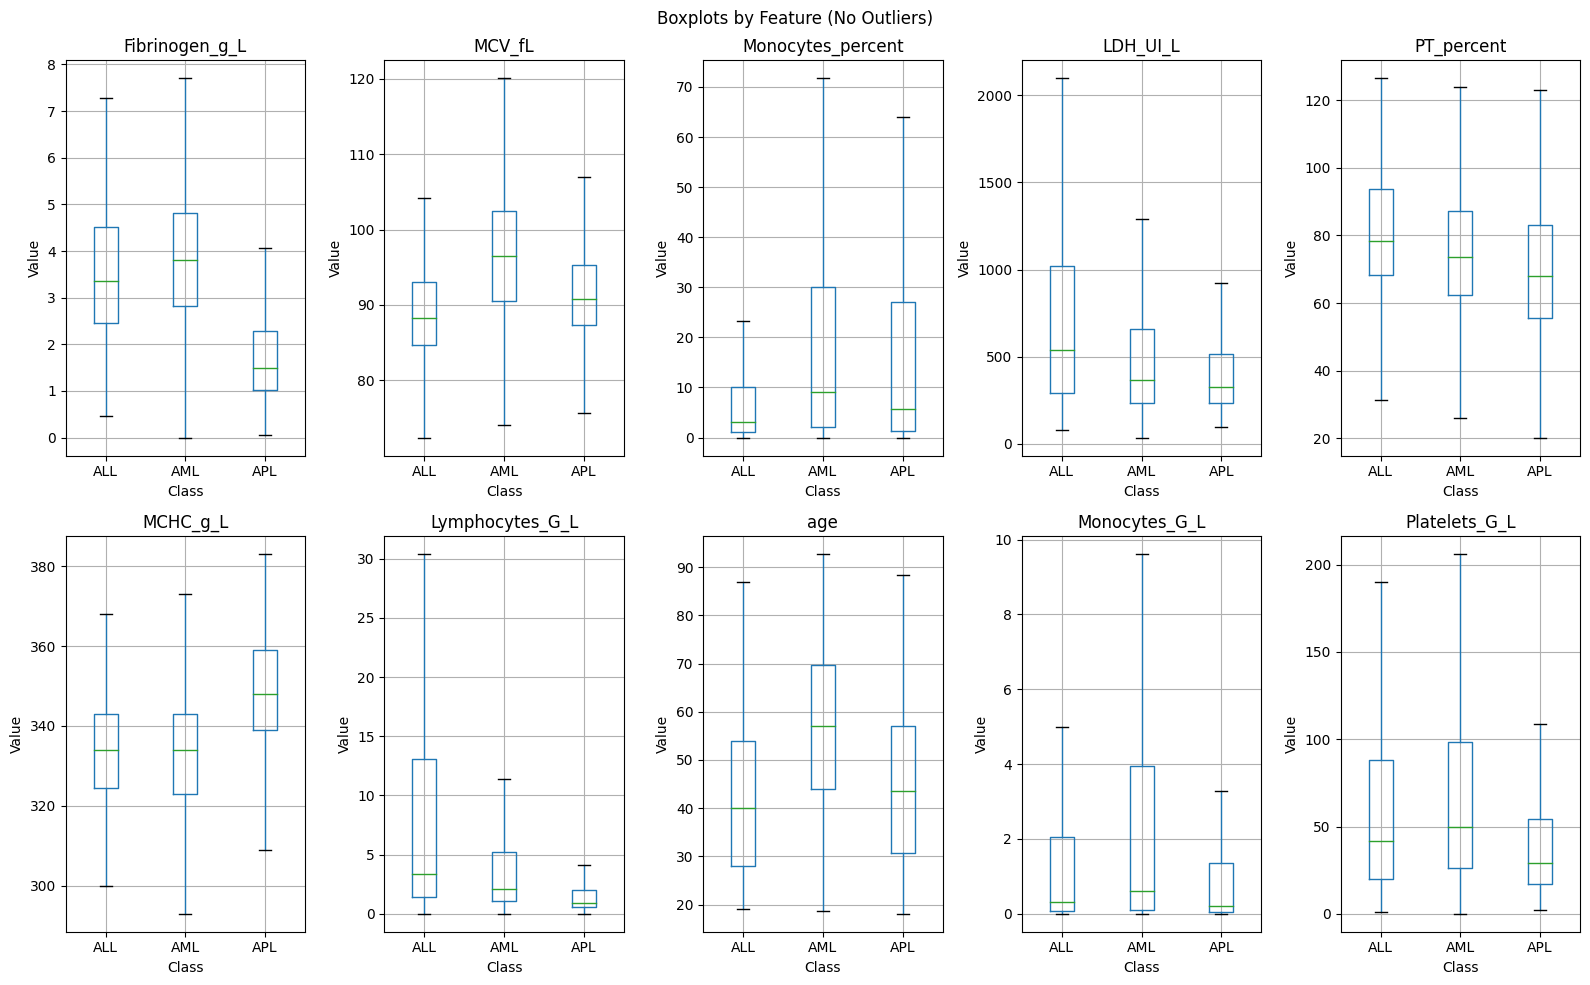

In [8]:
plot_boxplots_by_feature(df, "Boxplots by Feature (No Outliers)")

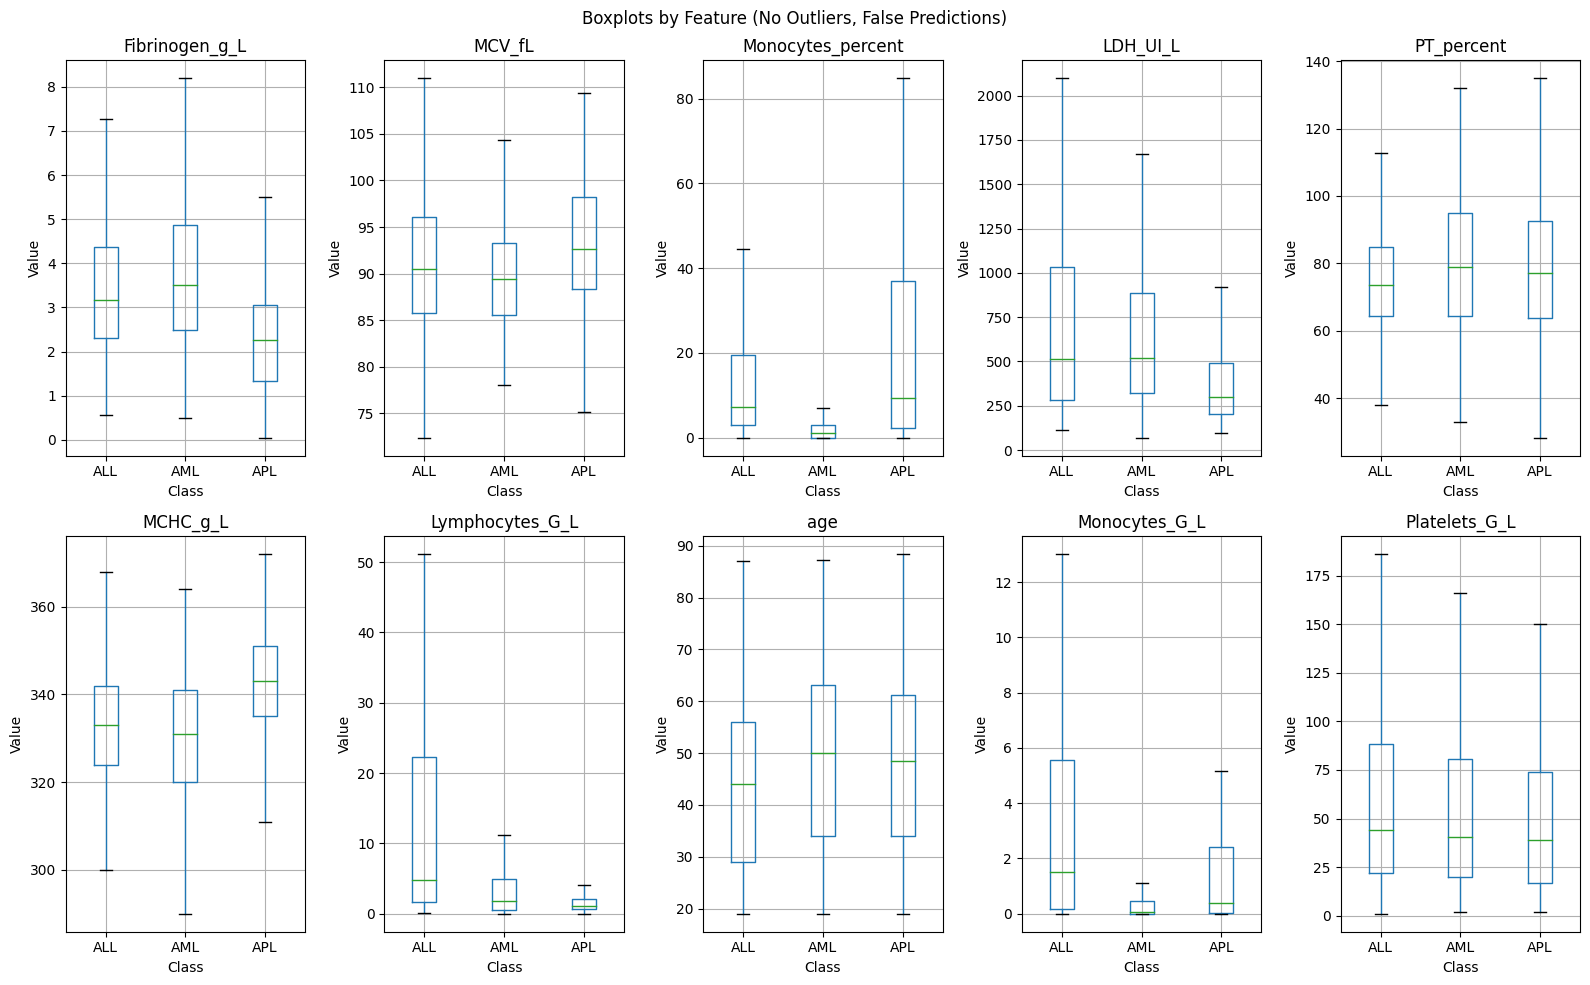

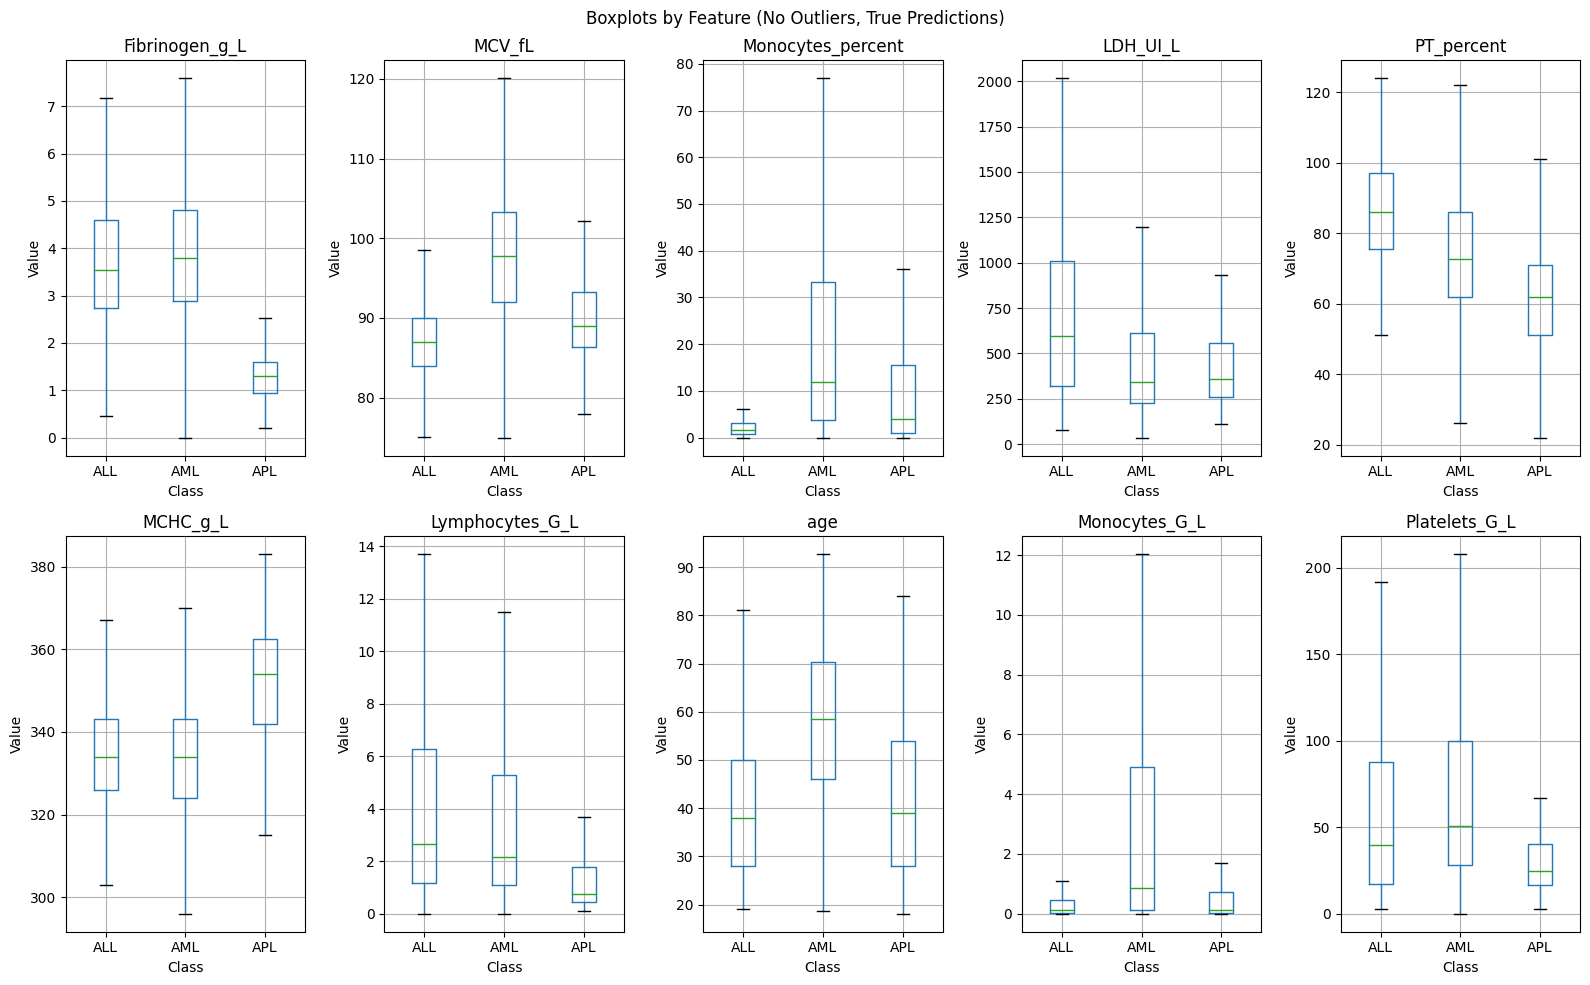

In [9]:
# idmax on 
prediction_columns = ['prediction.ALL', 'prediction.AML', 'prediction.APL']
df['prediction.ALL'].idxmax()

df["predicted_class"] = (
    df[prediction_columns]
    .idxmax(axis=1)
    .str.replace("prediction.", "", regex=False)
)

df_false = df[df["class"] != df["predicted_class"]]
df_true = df[df["class"] == df["predicted_class"]]

# Do bloxplot for each feature by predicted class for tp, fp, tn, fn
plot_boxplots_by_feature(df_false, "Boxplots by Feature (No Outliers, False Predictions)")
plot_boxplots_by_feature(df_true, "Boxplots by Feature (No Outliers, True Predictions)")

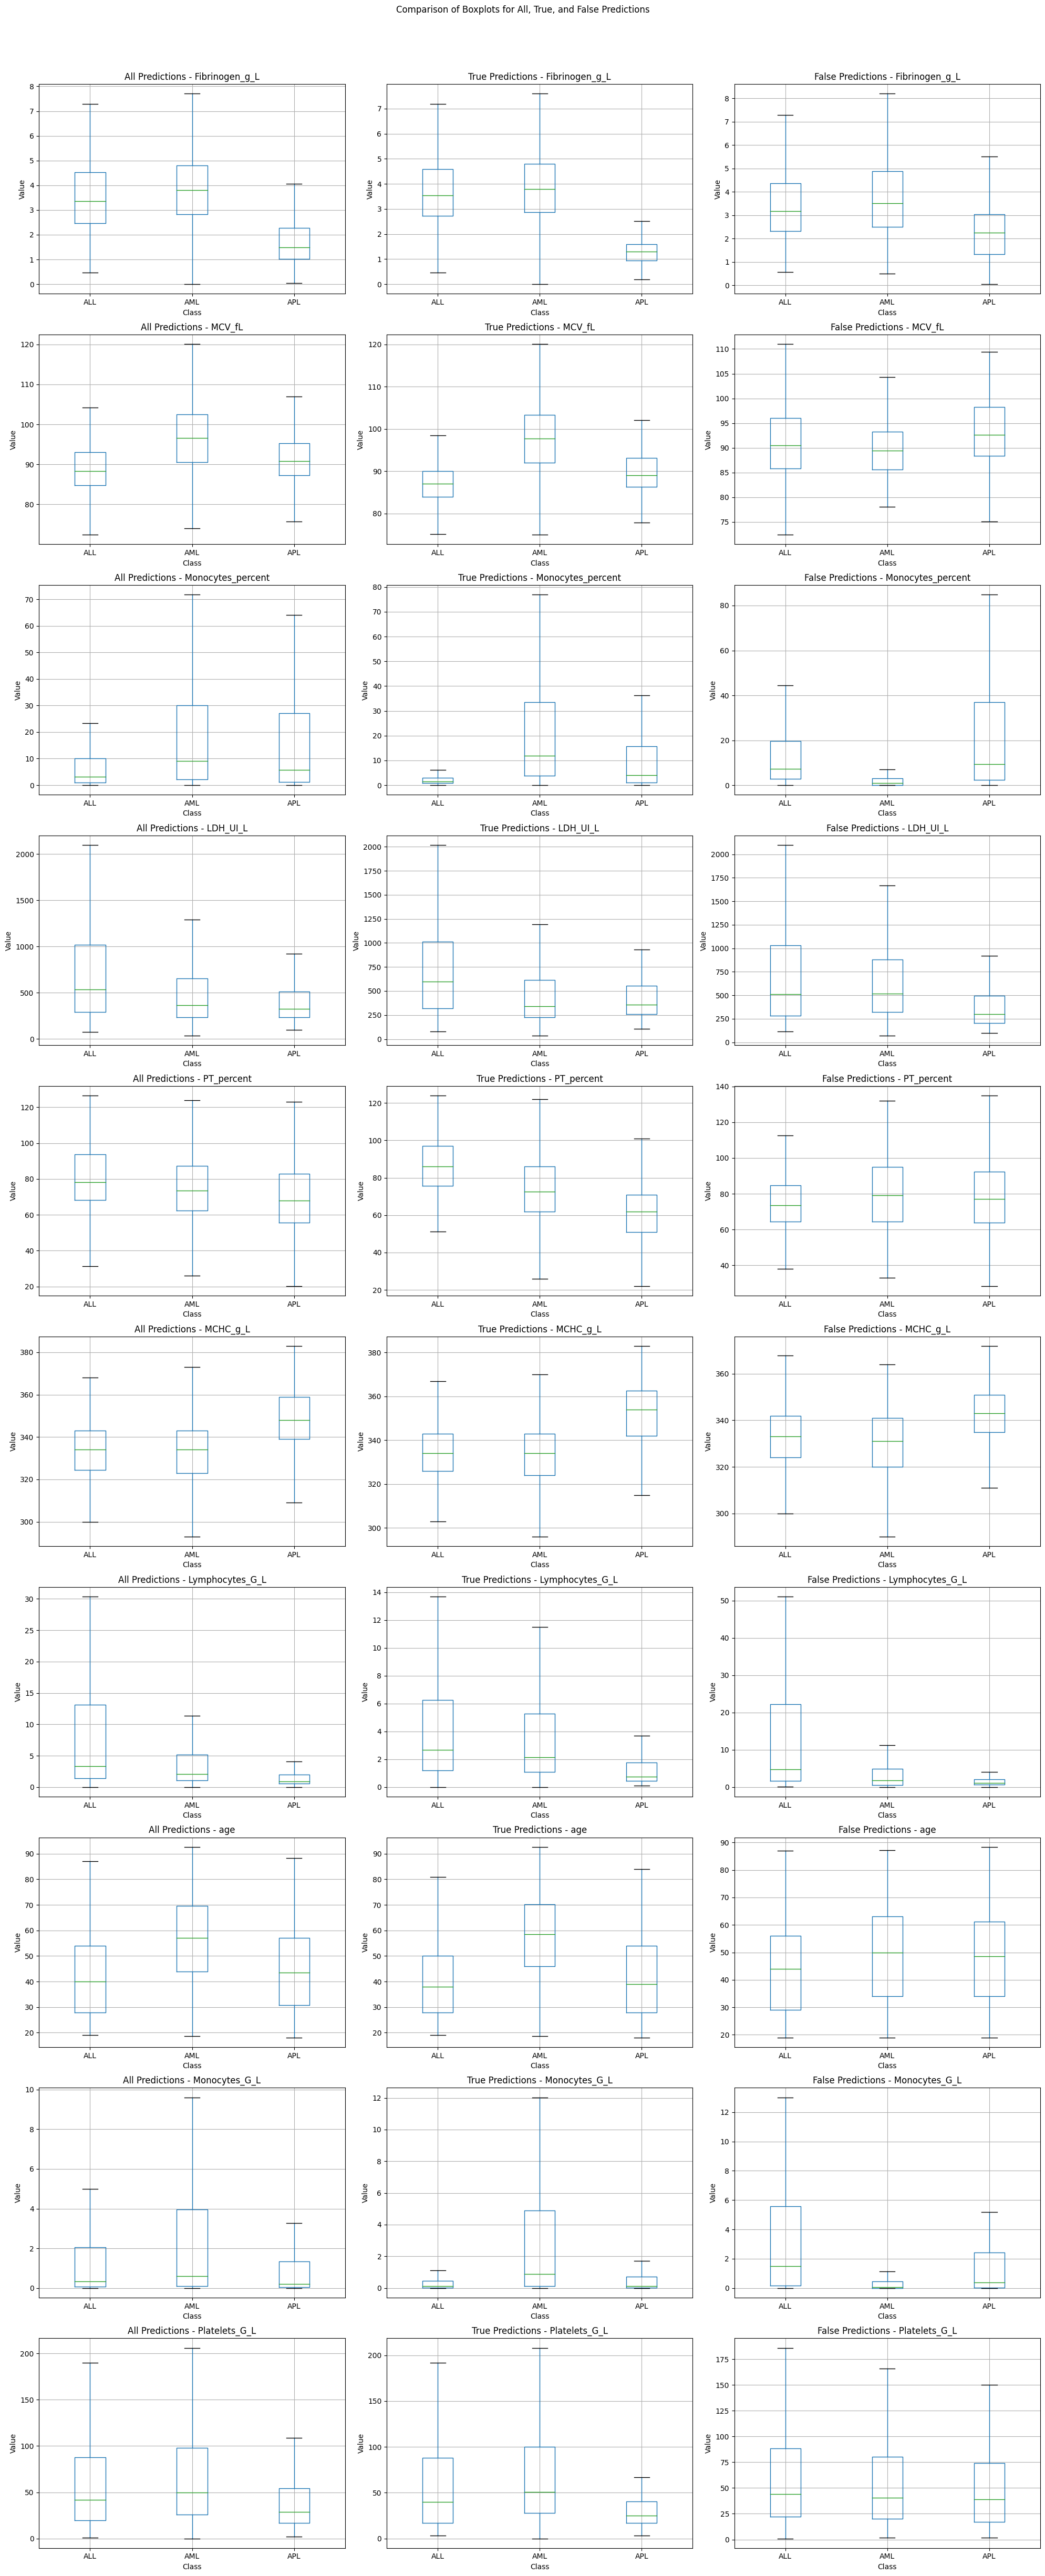

In [10]:
import matplotlib.pyplot as plt

def plot_combined_boxplots(df, title):
    prediction_categories = {
        "All Predictions": df,
        "True Predictions": df[df["class"] == df["predicted_class"]],
        "False Predictions": df[df["class"] != df["predicted_class"]]
    }

    # Number of features to plot
    n_features = len(features)

    # Create a figure for all three categories
    fig, axes = plt.subplots(n_features, 3, figsize=(20, 5 * n_features), sharey=False)

    # Iterate over features and prediction categories
    for row, feature in enumerate(features):
        for col, (category_name, category_df) in enumerate(prediction_categories.items()):
            category_df.boxplot(
                column=feature,
                by='class',
                ax=axes[row, col],
                showfliers=False  # Exclude outliers
            )
            axes[row, col].set_title(f"{category_name} - {feature}")
            axes[row, col].set_xlabel("Class")
            axes[row, col].set_ylabel("Value")

    # Adjust layout and title
    plt.suptitle(title)
    plt.tight_layout()
    plt.subplots_adjust(top=0.95)
    plt.show()

# Example usage
plot_combined_boxplots(df, "Comparison of Boxplots for All, True, and False Predictions")

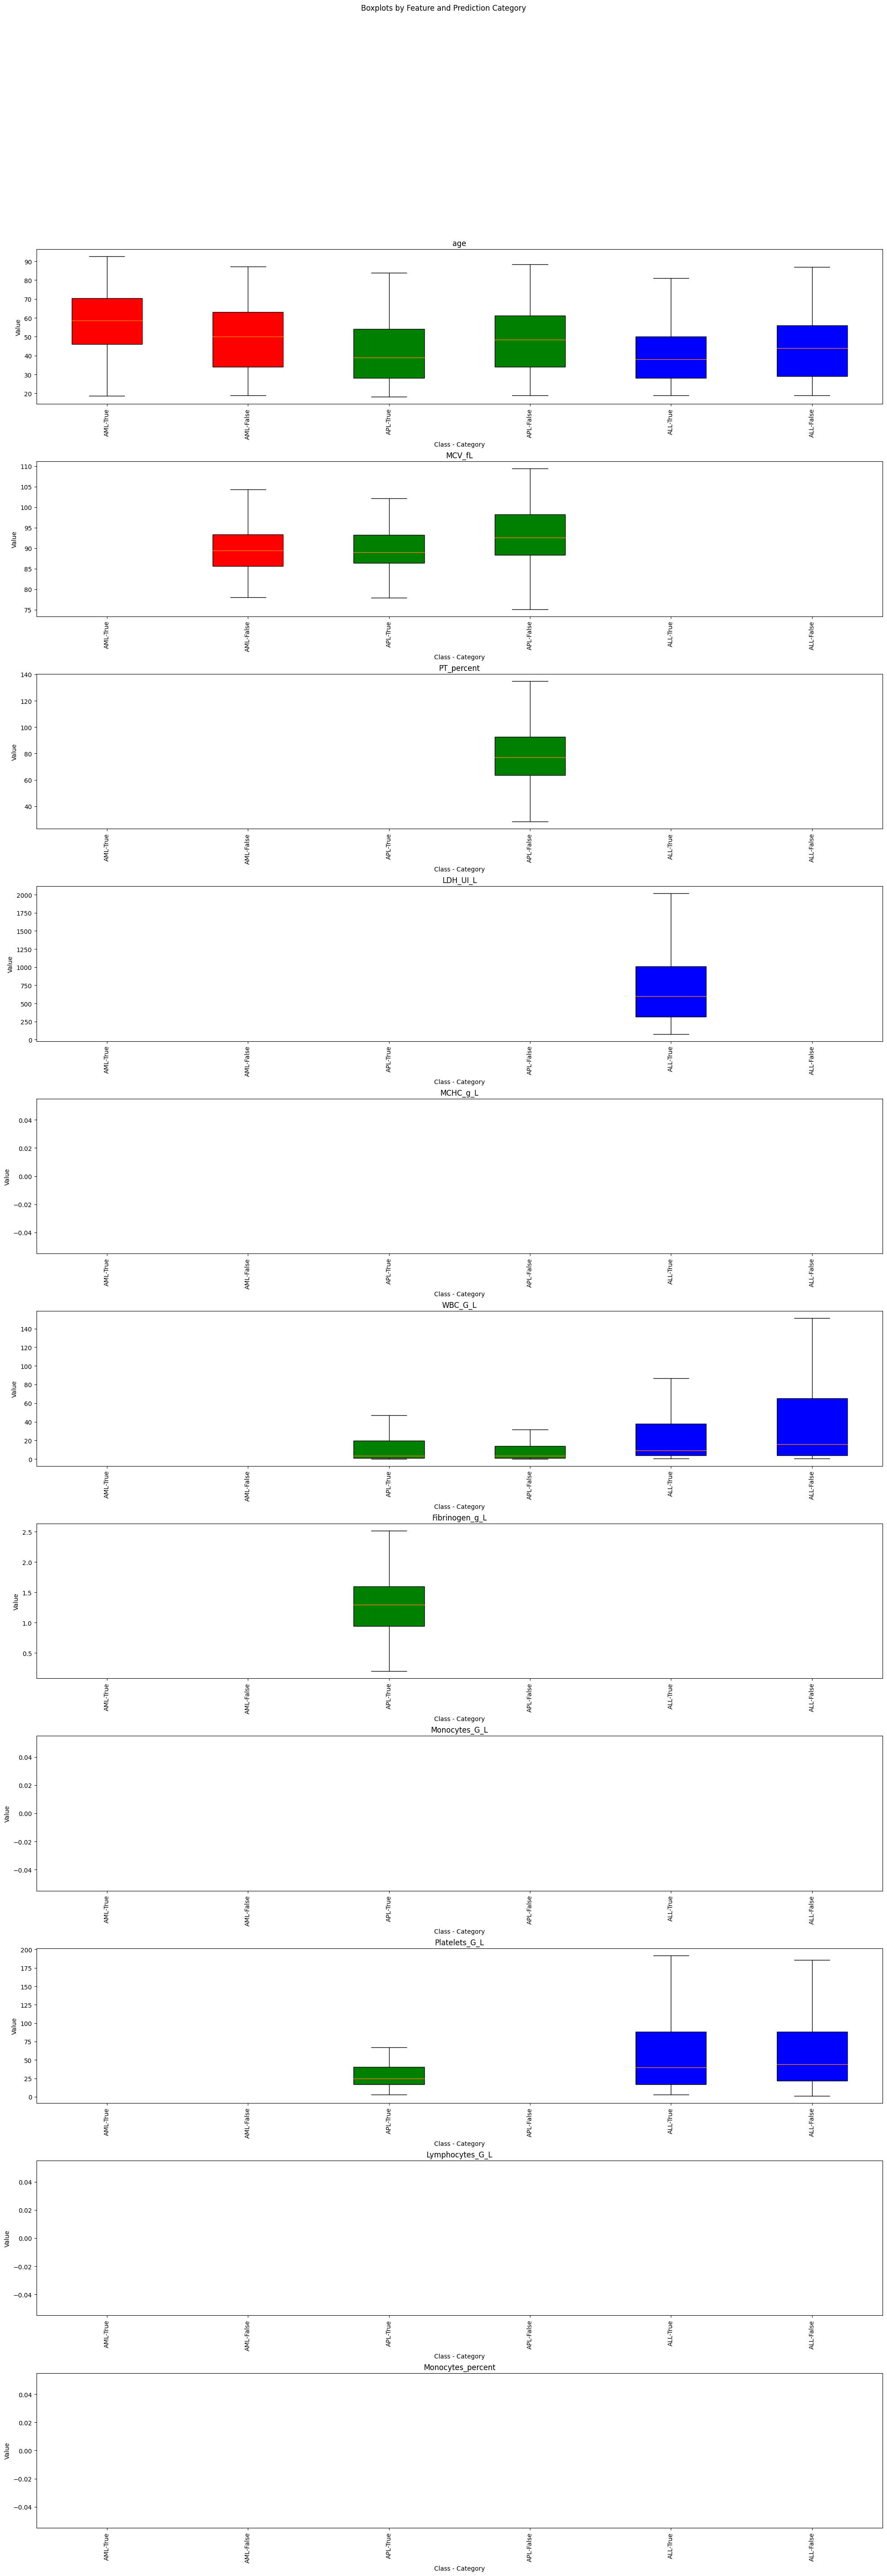

In [11]:
import matplotlib.pyplot as plt

def plot_combined_boxplots(df, features, title):
    prediction_categories = {
        "True": df[df["class"] == df["predicted_class"]],
        "False": df[df["class"] != df["predicted_class"]]
    }

    # Define colors for classes
    class_colors = {
        "APL": "green",
        "AML": "red",
        "ALL": "blue"
    }

    # Number of features to plot
    n_features = len(features)

    # Create a figure for all combined plots
    fig, axes = plt.subplots(n_features, 1, figsize=(20, 5 * n_features), sharey=False)

    if n_features == 1:
        axes = [axes]  # Ensure axes is iterable if there's only one feature

    for i, feature in enumerate(features):
        feature_data = []
        feature_labels = []
        feature_colors = []

        # Group by class first, then prediction category
        for class_value in df["class"].unique():
            for category_name, category_df in prediction_categories.items():
                class_data = category_df[category_df["class"] == class_value][feature]
                feature_data.append(class_data)
                feature_labels.append(f"{class_value}-{category_name}")
                feature_colors.append(class_colors.get(class_value, "gray"))  # Default to gray if class is unknown

        # Boxplot for the current feature
        ax = axes[i]
        boxplots = ax.boxplot(feature_data, labels=feature_labels, patch_artist=True, showfliers=False)
        
        # Apply colors to the boxes
        for patch, color in zip(boxplots['boxes'], feature_colors):
            patch.set_facecolor(color)

        ax.set_title(f"{feature}")
        ax.set_xlabel("Class - Category")
        ax.set_ylabel("Value")
        ax.tick_params(axis='x', rotation=90)

    # Adjust layout and show the plot
    plt.tight_layout()
    plt.subplots_adjust(top=0.95)
    plt.suptitle(title, y=1.05)
    plt.show()

# Example usage
# Assuming `df` is your DataFrame and `features` is a list of feature columns
features = ['age', 'MCV_fL', 'PT_percent', 'LDH_UI_L',
       'MCHC_g_L', 'WBC_G_L', 'Fibrinogen_g_L', 'Monocytes_G_L',
       'Platelets_G_L', 'Lymphocytes_G_L', 'Monocytes_percent']  # Replace with your actual feature names
# features = ['MCV_fL']
plot_combined_boxplots(df, features, "Boxplots by Feature and Prediction Category")